In [52]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the random module.
import random
from citipy import citipy
## Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Create a set of random Lats and Longis combo.
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lat, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":601,"main":"Snow","description":"snow","icon":"13d"}],"base":"stations","main":{"temp":20.68,"feels_like":10.35,"temp_min":17.38,"temp_max":23.4,"pressure":1011,"humidity":54},"visibility":10000,"wind":{"speed":8.99,"deg":316,"gust":18.99},"snow":{"1h":1.02},"clouds":{"all":75},"dt":1643566541,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1643543992,"sunset":1643579703},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [17]:
# Get the Json text of the 'Get' Request
city_weather.json()


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 20.68,
  'feels_like': 10.35,
  'temp_min': 17.38,
  'temp_max': 23.4,
  'pressure': 1011,
  'humidity': 54},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 316, 'gust': 18.99},
 'snow': {'1h': 1.02},
 'clouds': {'all': 75},
 'dt': 1643566541,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643543992,
  'sunset': 1643579703},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [19]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 21.25,
  'feels_like': 11.07,
  'temp_min': 18.14,
  'temp_max': 24.4,
  'pressure': 1011,
  'humidity': 52},
 'visibility': 10000,
 'wind': {'speed': 8.99, 'deg': 329, 'gust': 27},
 'snow': {'1h': 1.27},
 'clouds': {'all': 75},
 'dt': 1643568306,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643543992,
  'sunset': 1643579703},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [22]:
boston_data['sys']['country']

'US'

In [23]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 24.4 52 75 8.99


In [26]:
# Get the Date fro JSON file as a variable
date = boston_data["dt"]
#Convert the the date from UTC to y,m,d,hr,min, and secs format
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-30 18:45:06'

In [27]:
# We will need to do the following:

#1 Import our dependencies and initialize counters and an empty list that will hold the weather data.

#2 Loop through the cities list.
#3 Group the cities in sets of 50 to log the process as we find the weather data for each city.

##    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4 Build the 'city_url' or endpoint for each city.

#5 Log the URL and the record and set numbers.

#6 Make an API request for each city.

#7 Parse the JSON weather data for the following:
##    City, country, and date
##    Latitude and longitude
##    Maximum temperature
##    Humidity
##    Cloudiness
##    Wind speed

#8 Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [32]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 14 | yining
Processing Record 2 of Set 14 | manaure
Processing Record 3 of Set 14 | tasiilaq
Processing Record 4 of Set 14 | galle
Processing Record 5 of Set 14 | victoria
Processing Record 6 of Set 14 | saint-philippe
Processing Record 7 of Set 14 | castro
Processing Record 8 of Set 14 | dibaya
City not found. Skipping...
Processing Record 9 of Set 14 | alta floresta
Processing Record 10 of Set 14 | klaksvik
Processing Record 11 of Set 14 | aqtobe
Processing Record 12 of Set 14 | clyde river
Processing Record 13 of Set 14 | dikson
Processing Record 14 of Set 14 | port elizabeth
Processing Record 15 of Set 14 | turukhansk
Processing Record 16 of Set 14 | jamestown
Processing Record 17 of Set 14 | mahenge
Processing Record 18 of Set 14 | camana
Processing Record 19 of Set 14 | ushuaia
Processing Record 20 of Set 14 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 14 | east london
Processing Record 22 of Set 14 | naryan-mar
Processing Rec

Processing Record 32 of Set 17 | tatarsk
Processing Record 33 of Set 17 | kuloy
Processing Record 34 of Set 17 | jilib
Processing Record 35 of Set 17 | ndjole
Processing Record 36 of Set 17 | ilo
Processing Record 37 of Set 17 | totma
Processing Record 38 of Set 17 | antalaha
Processing Record 39 of Set 17 | caravelas
Processing Record 40 of Set 17 | fort-shevchenko
Processing Record 41 of Set 17 | makushino
Processing Record 42 of Set 17 | grenaa
Processing Record 43 of Set 17 | santa cruz
Processing Record 44 of Set 17 | kisangani
Processing Record 45 of Set 17 | lagoa
Processing Record 46 of Set 17 | vestmannaeyjar
Processing Record 47 of Set 17 | veraval
Processing Record 48 of Set 17 | san luis
Processing Record 49 of Set 17 | leshukonskoye
Processing Record 50 of Set 17 | oeiras
Processing Record 1 of Set 18 | ventspils
Processing Record 2 of Set 18 | kushmurun
Processing Record 3 of Set 18 | axim
Processing Record 4 of Set 18 | vagur
Processing Record 5 of Set 18 | nuuk
Processi

Processing Record 21 of Set 21 | janakpur
Processing Record 22 of Set 21 | namibe
Processing Record 23 of Set 21 | athens
Processing Record 24 of Set 21 | ulagan
Processing Record 25 of Set 21 | bossangoa
Processing Record 26 of Set 21 | akdepe
Processing Record 27 of Set 21 | soubre
Processing Record 28 of Set 21 | tambopata
Processing Record 29 of Set 21 | porto
Processing Record 30 of Set 21 | starkville
Processing Record 31 of Set 21 | ouesso
Processing Record 32 of Set 21 | kitob
Processing Record 33 of Set 21 | havoysund
Processing Record 34 of Set 21 | thompson
Processing Record 35 of Set 21 | tarascon
Processing Record 36 of Set 21 | cheuskiny
City not found. Skipping...
Processing Record 37 of Set 21 | bhadravati
Processing Record 38 of Set 21 | alegrete
Processing Record 39 of Set 21 | malartic
Processing Record 40 of Set 21 | labytnangi
Processing Record 41 of Set 21 | zlocieniec
Processing Record 42 of Set 21 | santa rosa
Processing Record 43 of Set 21 | kuche
City not foun

Processing Record 6 of Set 25 | copiapo
Processing Record 7 of Set 25 | turinsk
Processing Record 8 of Set 25 | chivay
Processing Record 9 of Set 25 | marsa matruh
Processing Record 10 of Set 25 | tubruq
City not found. Skipping...
Processing Record 11 of Set 25 | beni
Processing Record 12 of Set 25 | salta
Processing Record 13 of Set 25 | sembe
Processing Record 14 of Set 25 | selma
Processing Record 15 of Set 25 | sinop
Processing Record 16 of Set 25 | louisbourg
City not found. Skipping...
Processing Record 17 of Set 25 | uhlove
Processing Record 18 of Set 25 | kathmandu
Processing Record 19 of Set 25 | jamame
Processing Record 20 of Set 25 | saint combs
City not found. Skipping...
Processing Record 21 of Set 25 | santa isabel do rio negro
Processing Record 22 of Set 25 | san giovanni in fiore
Processing Record 23 of Set 25 | thinadhoo
Processing Record 24 of Set 25 | digby
Processing Record 25 of Set 25 | westport
Processing Record 26 of Set 25 | camopi
Processing Record 27 of Set 

In [33]:
len(city_data)

572

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yining,29.0361,114.5636,37.15,86,100,1.92,CN,2022-01-30 19:35:06
1,Manaure,11.7751,-72.4445,84.31,69,1,17.02,CO,2022-01-30 19:35:07
2,Tasiilaq,65.6145,-37.6368,8.76,37,94,22.75,GL,2022-01-30 19:35:07
3,Galle,6.0367,80.2170,76.71,88,28,4.47,LK,2022-01-30 19:35:07
4,Victoria,22.2855,114.1577,59.32,76,90,1.99,HK,2022-01-30 19:35:08
5,Saint-Philippe,-21.3585,55.7679,80.19,82,60,14.36,RE,2022-01-30 19:35:08
6,Castro,-24.7911,-50.0119,63.66,99,100,5.93,BR,2022-01-30 19:35:08
7,Alta Floresta,-9.8756,-56.0861,85.82,70,75,8.05,BR,2022-01-30 19:35:09
8,Klaksvik,62.2266,-6.5890,34.72,97,100,18.57,FO,2022-01-30 19:35:09
9,Aqtobe,50.2797,57.2072,26.69,86,75,22.37,KZ,2022-01-30 19:30:21


In [36]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yining,CN,2022-01-30 19:35:06,29.0361,114.5636,37.15,86,100,1.92
1,Manaure,CO,2022-01-30 19:35:07,11.7751,-72.4445,84.31,69,1,17.02
2,Tasiilaq,GL,2022-01-30 19:35:07,65.6145,-37.6368,8.76,37,94,22.75
3,Galle,LK,2022-01-30 19:35:07,6.0367,80.2170,76.71,88,28,4.47
4,Victoria,HK,2022-01-30 19:35:08,22.2855,114.1577,59.32,76,90,1.99
5,Saint-Philippe,RE,2022-01-30 19:35:08,-21.3585,55.7679,80.19,82,60,14.36
6,Castro,BR,2022-01-30 19:35:08,-24.7911,-50.0119,63.66,99,100,5.93
7,Alta Floresta,BR,2022-01-30 19:35:09,-9.8756,-56.0861,85.82,70,75,8.05
8,Klaksvik,FO,2022-01-30 19:35:09,62.2266,-6.5890,34.72,97,100,18.57
9,Aqtobe,KZ,2022-01-30 19:30:21,50.2797,57.2072,26.69,86,75,22.37


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Get today's date in seconds
today = time.strftime("%x")
today

'01/30/22'

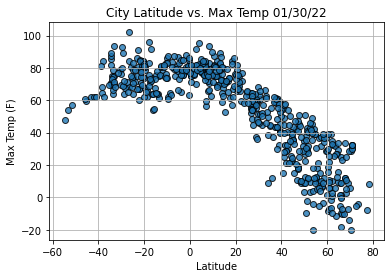

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build a scatter plot with latitude vs max temp
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incororate the other graph properties
plt.title(F"City Latitude vs. Max Temp" + " " + time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png", bbox_inches='tight')

# Show plot
plt.show()

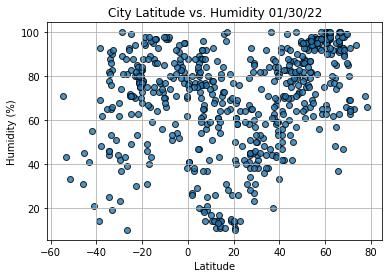

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png", bbox_inches='tight')
# Show plot.
plt.show()

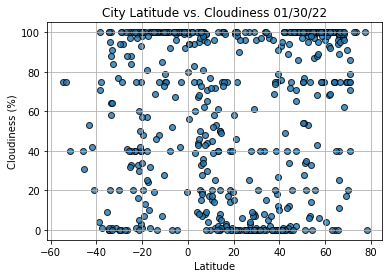

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png", bbox_inches='tight')
# Show plot.
plt.show()

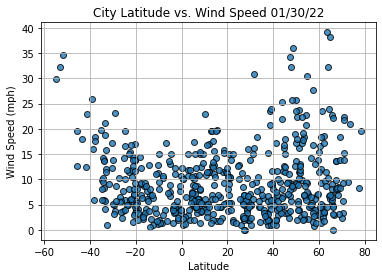

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png", bbox_inches='tight')
# Show plot.
plt.show()

In [66]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [55]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yining,CN,2022-01-30 19:35:06,29.0361,114.5636,37.15,86,100,1.92
1,Manaure,CO,2022-01-30 19:35:07,11.7751,-72.4445,84.31,69,1,17.02
2,Tasiilaq,GL,2022-01-30 19:35:07,65.6145,-37.6368,8.76,37,94,22.75
3,Galle,LK,2022-01-30 19:35:07,6.0367,80.2170,76.71,88,28,4.47
4,Victoria,HK,2022-01-30 19:35:08,22.2855,114.1577,59.32,76,90,1.99


In [56]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [57]:
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Yining,CN,2022-01-30 19:35:06,29.0361,114.5636,37.15,86,100,1.92
1,1,Manaure,CO,2022-01-30 19:35:07,11.7751,-72.4445,84.31,69,1,17.02
2,2,Tasiilaq,GL,2022-01-30 19:35:07,65.6145,-37.6368,8.76,37,94,22.75
3,3,Galle,LK,2022-01-30 19:35:07,6.0367,80.2170,76.71,88,28,4.47
4,4,Victoria,HK,2022-01-30 19:35:08,22.2855,114.1577,59.32,76,90,1.99


In [59]:
index13 = city_data_df.loc[13]
index13.head()

City_ID                     13
City                Turukhansk
Country                     RU
Date       2022-01-30 19:35:10
Lat                    65.8167
Name: 13, dtype: object

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [62]:
print(len(northern_hemi_df), len(southern_hemi_df))

406 166


In [63]:
# Plotting Northern Hemisphere cities
northern_hemi_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Yining,CN,2022-01-30 19:35:06,29.0361,114.5636,37.15,86,100,1.92
1,1,Manaure,CO,2022-01-30 19:35:07,11.7751,-72.4445,84.31,69,1,17.02
2,2,Tasiilaq,GL,2022-01-30 19:35:07,65.6145,-37.6368,8.76,37,94,22.75
3,3,Galle,LK,2022-01-30 19:35:07,6.0367,80.2170,76.71,88,28,4.47
4,4,Victoria,HK,2022-01-30 19:35:08,22.2855,114.1577,59.32,76,90,1.99
8,8,Klaksvik,FO,2022-01-30 19:35:09,62.2266,-6.5890,34.72,97,100,18.57
9,9,Aqtobe,KZ,2022-01-30 19:30:21,50.2797,57.2072,26.69,86,75,22.37
10,10,Clyde River,CA,2022-01-30 19:35:09,70.4692,-68.5914,-19.97,69,75,3.44
11,11,Dikson,RU,2022-01-30 19:33:47,73.5069,80.5464,-3.96,94,100,21.03
13,13,Turukhansk,RU,2022-01-30 19:35:10,65.8167,87.9833,0.39,95,98,9.06


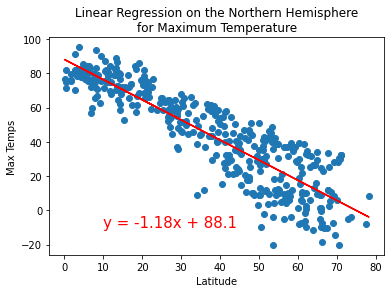

In [88]:
# Plotting Northern Hemisphere cities
## plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temps', (10, -10))

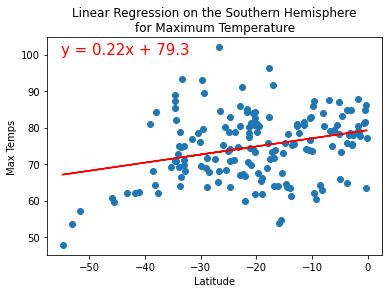

In [89]:
# Plotting Southern Hemisphere cities
## plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temps', (-55, 100))

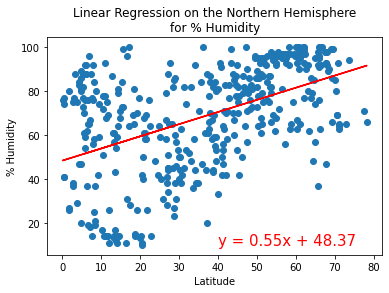

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',(40,10))

In [104]:
linregress(x_values, y_values)

LinregressResult(slope=0.5536627015634294, intercept=48.37080295136268, rvalue=0.48472597774115234, pvalue=2.5932737168132743e-25, stderr=0.04970505597507198, intercept_stderr=2.0999445809051407)

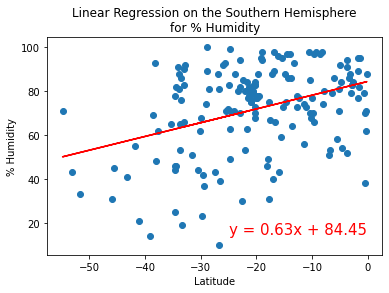

In [92]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', 
                       '% Humidity',(-25,15))

In [102]:
linregress(x_values, y_values)

LinregressResult(slope=0.6265606800178474, intercept=84.44992389977608, rvalue=0.3780073072257732, pvalue=5.139036167279806e-07, stderr=0.1198283059062477, intercept_stderr=2.806332833420213)

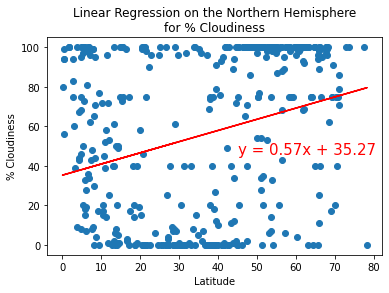

In [115]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(45,46))      

In [117]:
linregress(x_values, y_values)

LinregressResult(slope=0.5658446047904151, intercept=35.266917048909704, rvalue=0.2885470795848058, pvalue=3.169387717069865e-09, stderr=0.09341423086688802, intercept_stderr=3.946574529293831)

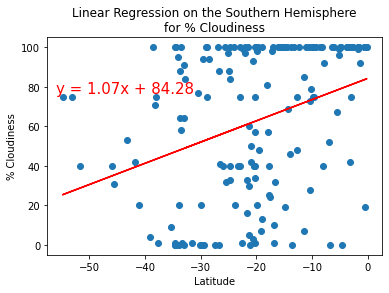

LinregressResult(slope=1.0748591243505226, intercept=84.28476250517866, rvalue=0.3406172978854973, pvalue=7.108881102753136e-06, stderr=0.2316776335236899, intercept_stderr=5.425801064360433)

In [125]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(-56,77)),   
# Print line regress values
linregress(x_values, y_values)

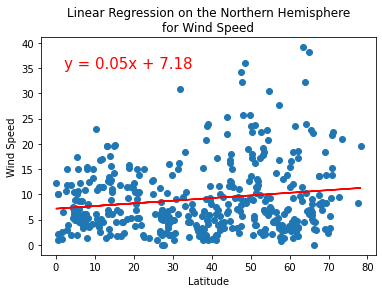

LinregressResult(slope=0.052257017386498864, intercept=7.178368359501192, rvalue=0.16154930812377438, pvalue=0.0010885732782934233, stderr=0.01588204500639397, intercept_stderr=0.6709863552229964)

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(2,35))
# Print line regress values
linregress(x_values, y_values)